<h1>ACTIVITY 2 - ACCIDENT DATES DATA ANALYTICS PROJECT(1-25)</h1>
<hr>

<h2>Analyst: Raeven Maranan</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap

In [2]:
acci=pd.read_csv('accident_data.csv')

In [3]:
acci

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], dayfirst=True)

<h1>1) How many accidents are recorded each year, and which year had the highest accident count?</h1>
<hr>

In [5]:
acci['Year'] = acci['Accident Date'].dt.year
acci_per_year = acci.groupby('Year').size()
print(acci_per_year)
print("Year with most accidents:", acci_per_year.idxmax())

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64
Year with most accidents: 2019


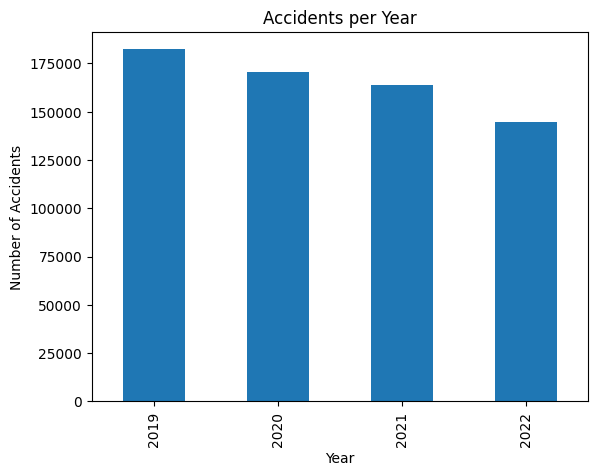

In [6]:
acci_per_year.plot(kind='bar', title="Accidents per Year")
plt.ylabel("Number of Accidents")
plt.show()

<h2>insight 1</h2>
<h4>according to the data set in the year 2019 there were 182115 accidents,
2020 had 170591,2021 had 163554, and 2022 had 144419 making 2019 the have th ehighest accident count</h4> 

<h1>2)What percentage of all accidents are classified as “Serious” or “Fatal”?</h1>
<hr>

In [7]:
serious_fatal = acci[acci['Accident_Severity'].isin(['Serious','Fatal'])]
percentage_sf = (len(serious_fatal) / len(acci)) * 100
print(f"Serious or Fatal accidents: {percentage_sf:.2f}%")

Serious or Fatal accidents: 14.66%


<h2>insight 2</h2>
<h4>according to the data set th eprecentage of serious or fatal accidents 14.66% </h4> 

<h1>3) What is the average number of casualties per accident, broken down by accident severity?</h1>
<hr>

In [8]:
acci.groupby('Accident_Severity')['Number_of_Casualties'].mean()


Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>insight 3</h2>
<h4>according to the data set the average for Fatal is 1.90,
Serious is 1.46, and Slight is 1.331402 </h4> 

<h1>4)What is the average number of vehicles involved per accident, broken down by road type?</h1>
<hr>

In [9]:
acci.groupby('Road_Type')['Number_of_Vehicles'].mean()

Road_Type
Dual carriageway      2.009766
One way street        1.585441
Roundabout            1.901323
Single carriageway    1.795911
Slip road             1.917483
Name: Number_of_Vehicles, dtype: float64

<h2>insight 4</h2>
<h4>according to the data set the average no of vehicles broken down by road type is;Dual carriageway-2.009766,
One way street-1.58, Roundabout-1.90, Single carriageway-1.79, and Slip road-1.91- </h4> 

<h1>5)Wwhich district area has the widest range?
</h1>
<hr>

In [10]:
range_by_area = acci.groupby('District Area')['Number_of_Casualties'].agg(lambda x: x.max()-x.min())
print("widest casualty range:", range_by_area.idxmax(), "range:", range_by_area.max())

widest casualty range: South Bucks range: 67


<h2>insight 5</h2>
<h4>according to the data set the district with widest casualty rangeis South Bucks with the range of 67</h4> 

<h1>6) Which top 5 district areas have the highest number of accidents, and their combined percentage?
</h1>
<hr>

In [11]:
top5_districts = acci['District Area'].value_counts().head(5)
top5_districts


District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

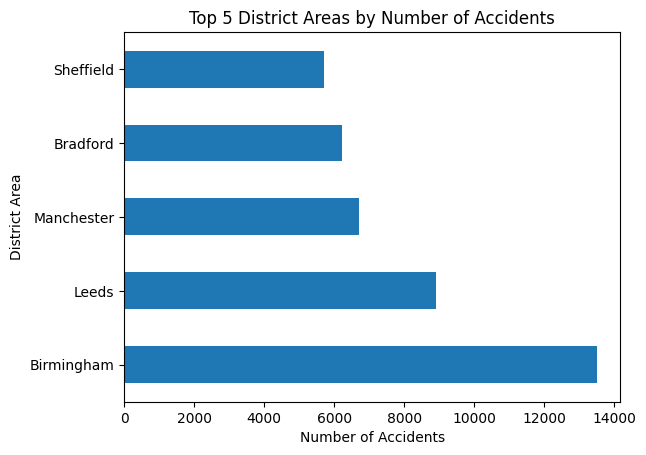

In [12]:
top5_districts.plot(kind='barh', title="Top 5 District Areas by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.show()

<h2>insight 6</h2>
<h4>according to the data set the 5 areas with the highset no. of accidents is; Birmingham-13491, Leeds-8898, Manchester-6720, Bradford-6212,and Sheffield-5710</h4> 

<h1>7)Which district has the highest average casualties per accident, compared to overall average?
</h1>
<hr>

In [13]:
district_avg = acci.groupby('District Area')['Number_of_Casualties'].mean()
print("highest average casualties:", district_avg.idxmax(), "Value:", district_avg.max())
print("overall average:", acci['Number_of_Casualties'].mean())

highest average casualties: Blaeu Gwent Value: 1.6936936936936937
overall average: 1.357040257068864


<h2>insight 7</h2>
<h4>according to the data set the district thats has the highest average casualties per accident compared to overall average is Blaeu Gwent with a average of 1.69</h4> 

<h1>8) Which 3 weather conditions have the highest average casualties?
</h1>
<hr>

In [14]:
top3_weather = acci.groupby('Weather_Conditions')['Number_of_Casualties'].mean().nlargest(3)
print(top3_weather)

Weather_Conditions
Fog or mist             1.452948
Snowing + high winds    1.418079
Raining + high winds    1.416641
Name: Number_of_Casualties, dtype: float64


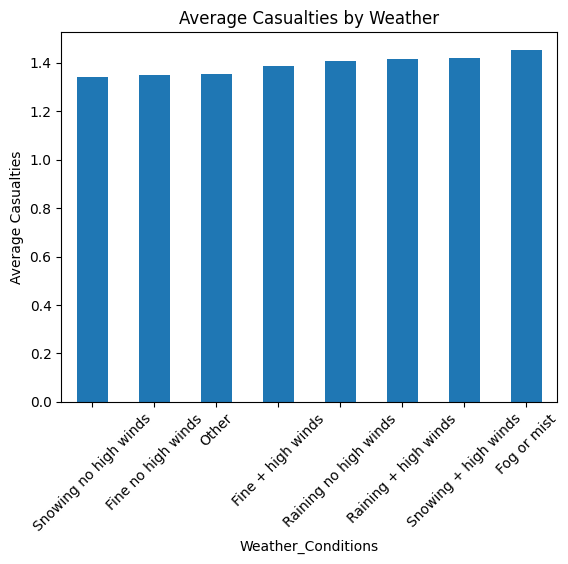

In [15]:

acci.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values().plot(kind='bar', title='Average Casualties by Weather')
plt.xticks(rotation=45)
plt.ylabel("Average Casualties")
plt.show()

<h2>insight 8</h2>
<h4>according to the data set the 3 weather conditions have the highest average casualties are; Fog or mist -1.452948, Snowing + high winds-1.418079, and Raining + high winds-1.416641</h4> 

<h1>9)Which road surface condition has the highest casualty-to-vehicle ratio?
</h1>
<hr>

In [16]:
acci['Casualty_Vehicle_Ratio'] = acci['Number_of_Casualties'] / acci['Number_of_Vehicles']
acci.groupby('Road_Surface_Conditions')['Casualty_Vehicle_Ratio'].mean().idxmax()

'Flood over 3cm. deep'

<h2>insight 9</h2>
<h4>according to the data set the road surface condition has the highest casualty-to-vehicle ratio is Flood over 3cm. deep</h4> 

<h1>10)What is the average number of casualties per severity category, grouped by urban vs rural?
</h1>
<hr>

In [17]:
print(acci.groupby(['Urban_or_Rural_Area','Accident_Severity'])['Number_of_Casualties'].mean())

Urban_or_Rural_Area  Accident_Severity
Rural                Fatal                2.094804
                     Serious              1.682301
                     Slight               1.422972
Unallocated          Serious              1.000000
                     Slight               1.200000
Urban                Fatal                1.552288
                     Serious              1.309693
                     Slight               1.282586
Name: Number_of_Casualties, dtype: float64


<h2>insight 10</h2>
<h4>according to the data set the rural areas often have higher casualty averages due to higher travel speeds and delayed emergency response./h4> 

<h1>11)In urban areas, what percentage of accidents happen during wet or damp roads?
</h1>
<hr>

In [18]:
urban = acci[acci['Urban_or_Rural_Area'] == 'Urban']
pct_wet_urban = (len(urban[urban['Road_Surface_Conditions']=='Wet or damp']) / len(urban))*100
print(f"{pct_wet_urban:.2f}% of urban accidents happened on wet/damp roads")

25.54% of urban accidents happened on wet/damp roads


<h2>insight 11</h2>
<h4>according to the data set a significant part of urban accidents happens on wet roads </h4> 

<h1>12)How many accidents involved more than three vehicles and happened during rain?
 </h1>
<hr>

In [19]:
len(acci[(acci['Number_of_Vehicles'] > 3) & (acci['Weather_Conditions'].str.contains("Rain", na=False))])

2147

<h2>insight 12</h2>
<h4>according to the data set around 2147 accidents involved more than three vehicles and happened during rain</h4> 

<h1>13)what isthe average number of casualties in accidents with less than3 vehicles
</h1>
<hr>

In [20]:
acci[acci['Number_of_Vehicles'] > 3]['Number_of_Casualties'].mean()

np.float64(2.1306739116029423)

<h2>insight 13</h2>
<h4>according to the data set the average number of casualties in accidents with less than3 vehicles is 2.13 </h4> 

<h1>14)what is the percentage of accidents during darkness that resulted in >1 casualty
</h1>
<hr>

In [21]:
dark = acci[acci['Light_Conditions'].str.contains('Dark', case=False, na=False)]
pct_dark_multi = (len(dark[dark['Number_of_Casualties']>1]) / len(dark))*100
print(f"{pct_dark_multi:.2f}%  dark accidents having more than one casualty")

25.81%  dark accidents having more than one casualty


<h2>insight 14</h2>
<h4>according to the data set 25.81% of the dark accidents had more than one casualty </h4> 

<h1>15) Most common weather condition among accidents with less than 2 casualtiesin comparison to fine weather
</h1>
<hr>

In [22]:
over2 = acci[acci['Number_of_Casualties'] > 2]['Weather_Conditions'].value_counts()
print("Most common weather:", over2.idxmax(), "Count:", over2.max())
print("Fine weather count:", acci[acci['Weather_Conditions']=='Fine no high winds'].shape[0])

Most common weather: Fine no high winds Count: 37600
Fine weather count: 520885


<h2>insight 15</h2>
<h4>according to the data set the most common weather condition among accidents with less than 2 casualtiesin comparison to fine weather is Fine no high winds </h4> 

<h1>16) Which month has highest accident-to-casualty ratio?
</h1>
<hr>

In [23]:
acci['Month'] = acci['Accident Date'].dt.month
ratio = acci.groupby('Month')['Number_of_Casualties'].sum() / acci.groupby('Month').size()
print("Month:", ratio.idxmax())

Month: 8


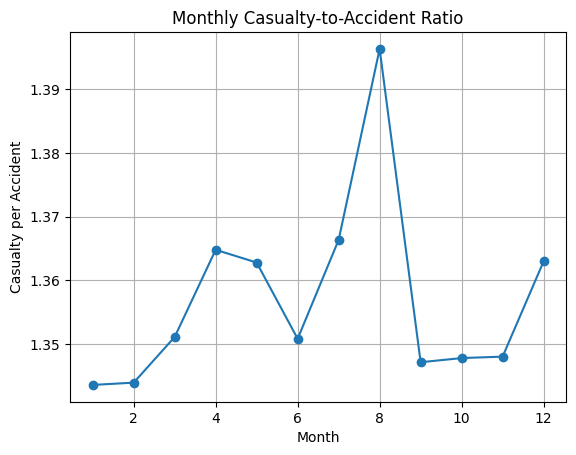

In [24]:
ratio.plot(kind='line', marker='o', title="Monthly Casualty-to-Accident Ratio")
plt.ylabel("Casualty per Accident")
plt.grid()
plt.show()


<h2>insight 16</h2>
<h4>according to the data set the month that has highest accident-to-casualty ratio is month 8 or August </h4> 

<h1>17)Which quarter of the year has the most accidents?
</h1>
<hr>

In [25]:
acci['Quarter'] = acci['Accident Date'].dt.quarter
acci['Quarter'].value_counts().idxmax()

np.int32(4)

<h2>insight 17</h2>
<h4>according to the data set the quarter of the year has the most accidents is month 4 or april </h4> 

<h1>18)Is there an upward or downward trend month-over-month?
</h1>
<hr>

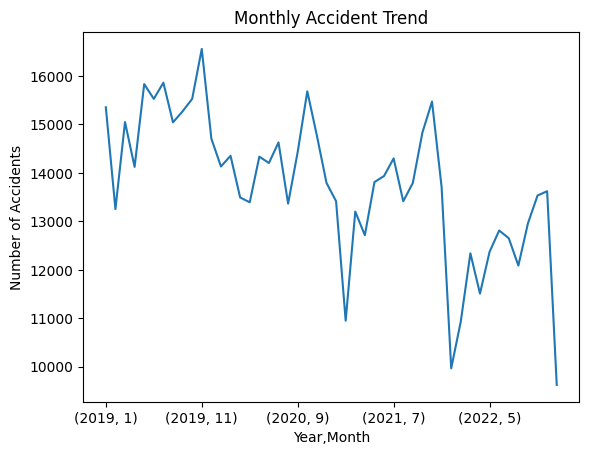

In [26]:
monthly_trend = acci.groupby(['Year','Month']).size()
monthly_trend.plot(kind='line', title="Monthly Accident Trend")
plt.ylabel("Number of Accidents")
plt.show()

<h2>insight 18</h2>
<h4>according to the data set there is an upward and downward trend in over a year and month</h4> 

<h1>19)Which day of the week has the highest average casualties per accident?
</h1>
<hr>

In [27]:
acci['DayOfWeek'] = acci['Accident Date'].dt.day_name()
print(acci.groupby('DayOfWeek')['Number_of_Casualties'].mean().sort_values(ascending=False))

DayOfWeek
Monday       1.465685
Sunday       1.423272
Saturday     1.350977
Tuesday      1.331793
Friday       1.323238
Thursday     1.321160
Wednesday    1.317925
Name: Number_of_Casualties, dtype: float64


<h2>insight 19</h2>
<h4>according to the data set the day of the week that has the highest average casualties per accident is monday with 1.46</h4> 

<h1>20) is there a correlation between number of vehicles & casualties?
</h1>
<hr>

In [28]:
corr_matrix = acci[['Number_of_Vehicles','Number_of_Casualties']].corr()
print(corr_matrix)

                      Number_of_Vehicles  Number_of_Casualties
Number_of_Vehicles              1.000000              0.228889
Number_of_Casualties            0.228889              1.000000


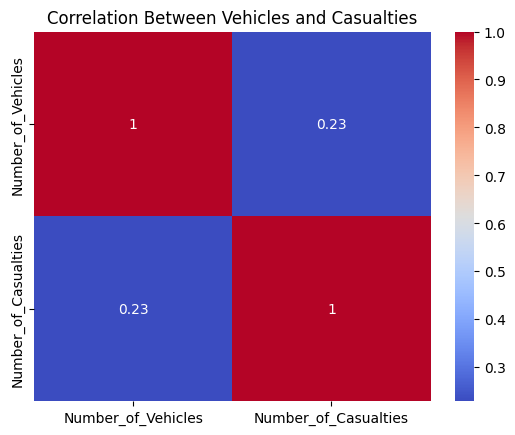

In [29]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Vehicles and Casualties")
plt.show()

<h2>insight 20</h2>
<h4>according to the data set there is apositive correlation that shows that multi-vehicle accidents usually lead to more casualties</h4> 

<h1>21)Compare casualties on dry vs wet roads
</h1>
<hr>

In [30]:
acci.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean()

Road_Surface_Conditions
Dry                     1.334736
Flood over 3cm. deep    1.495575
Frost or ice            1.348815
Snow                    1.359593
Wet or damp             1.411064
Name: Number_of_Casualties, dtype: float64

<h2>insight 21</h2>
<h4>according to the data set casualties are higher on wet roads</h4> 

<h1>22)waht is the relationship between weather and number of vehicles involved?
</h1>
<hr>

In [31]:
print(acci.groupby('Weather_Conditions')['Number_of_Vehicles'].mean().sort_values(ascending=False))

Weather_Conditions
Fine no high winds       1.836809
Raining no high winds    1.831610
Fog or mist              1.807823
Fine + high winds        1.779401
Raining + high winds     1.777951
Other                    1.777668
Snowing no high winds    1.754889
Snowing + high winds     1.737853
Name: Number_of_Vehicles, dtype: float64


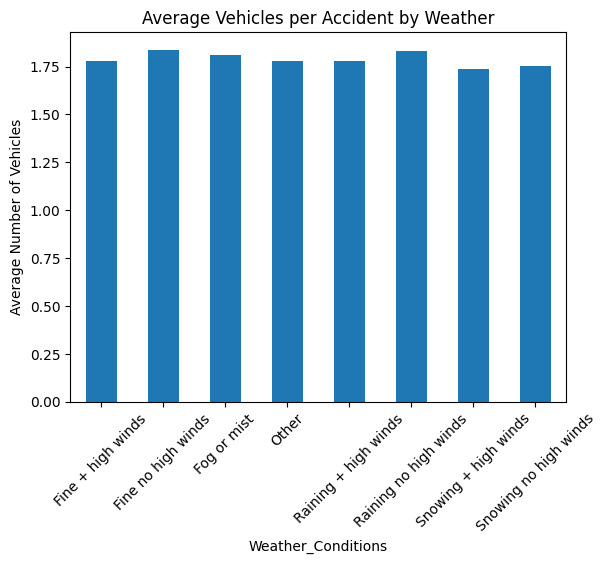

In [32]:
acci.groupby('Weather_Conditions')['Number_of_Vehicles'].mean().plot(kind='bar', title="Average Vehicles per Accident by Weather")
plt.xticks(rotation=45)
plt.ylabel("Average Number of Vehicles")
plt.show()

<h2>insight 22</h2>
<h4>according to the data setthe relationship between weather and number of vehicles involved depend on the weather types (fog/rain) that leads to more multi-vehicle accidents</h4> 

<h1>23)what vehicle type with highest average casualties per accident?
</h1>
<hr>

In [33]:
serious_fatal = acci[acci['Accident_Severity'].isin(['Serious','Fatal'])]
veh_distribution = serious_fatal['Vehicle_Type'].value_counts(normalize=True) * 100
print(veh_distribution)

Vehicle_Type
Car                                      75.391730
Van / Goods 3.5 tonnes mgw or under       5.182807
Motorcycle over 500cc                     3.918330
Bus or coach (17 or more pass seats)      3.817172
Goods 7.5 tonnes mgw and over             2.618758
Motorcycle 125cc and under                2.291542
Taxi/Private hire car                     1.988067
Motorcycle over 125cc and up to 500cc     1.155061
Motorcycle 50cc and under                 1.144739
Goods over 3.5t. and under 7.5t           0.953777
Other vehicle                             0.863973
Minibus (8 - 16 passenger seats)          0.314829
Agricultural vehicle                      0.312765
Pedal cycle                               0.046450
Name: proportion, dtype: float64


<h2>insight 23</h2>
<h4>according to the data set certain vehicle types like cars have the highest average with 75.39</h4> 

<h1>24)what road type with highest proportion of serious accidents?
</h1>
<hr>

In [34]:
road_counts = acci.groupby('Road_Type')['Accident_Severity'].value_counts(normalize=True).unstack()
print(road_counts['Serious'].sort_values(ascending=False))

Road_Type
Single carriageway    0.142355
One way street        0.122059
Dual carriageway      0.118140
Slip road             0.086777
Roundabout            0.083311
Name: Serious, dtype: float64


<h2>insight 24</h2>
<h4>according to the data set the road type with highest proportion of serious accidents is Single carriageway with 0.14  </h4> 

<h1>25) what is the most common combination of road surface, weather, and light condition?
</h1>
<hr>

In [35]:
acci.groupby(['Road_Surface_Conditions','Weather_Conditions','Light_Conditions']).size().idxmax()

('Dry', 'Fine no high winds', 'Daylight')

<h2>insight 25</h2>
<h4>according to the data set the most common combination of road surface, weather, and light condition is 'Dry', 'Fine no high winds', and 'Daylight'   </h4> 
